In [1]:
import numpy
import matplotlib.pyplot as plt
import numpy as np


## Configure plot display attributes

In [2]:
# Configure matplotlib
import seaborn as sns
sns.set()

%matplotlib inline
color_baseline = '#D36135' #baseline
hatch_baseline = '\\'
color_optimized1 = '#7FB069' #optimized 1
hatch_optimized1 = '.'
color_optimized2 = '#ECE4B7' #optimized 2
hatch_optimized2 = '*'
color_npbench_CPU = '#E6AA68' #NPBench_CPU
hatch_npbench_CPU = '-'
color_npbench_GPU = '#02020B' #NPBench_GPU
hatch_npbench_GPU = 'o'

## Azimint

### Roofline

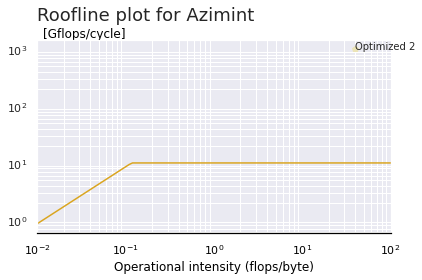

In [3]:
# Data points
kernel_name = 'Azimint'
#peak performance [GFLOPS]
peak_perf = 10
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline], 
          [500.38, 3.94, color_optimized1], 
          [40, 1000, color_optimized2]] # TODO Last datapoint NOT available

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], 'p', color=kernel[i][2])

# Add labels to each datapoint
for i, txt in enumerate(kernel_names):
    ax.annotate(txt, (kernel[i][0], kernel[i][1]))#, fontdict=dict(color='black', alpha=0.5))

#setup plot
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01,100])
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('#000000')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)

plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

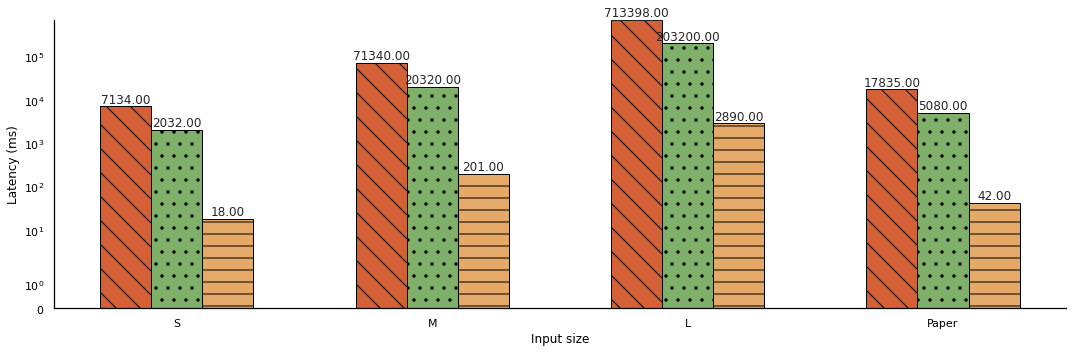

In [4]:
# Data points ####################################################################################

kernel_name = 'Azimint'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([7134,71340,713398,17835])
optimized_1 = np.array([2032,20320,203200,5080])
npbench_cpu = np.array([18,201,2890,42])

## PLOT ####################################################################################
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", hatch=hatch_baseline, edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", hatch=hatch_optimized1, edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", hatch=hatch_npbench_CPU, edgecolor = 'black')

ax.set_title('Latencies for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)
# plt.axvline(x=4.5, color='black')
ax1.set_yscale('symlog')

# yticklocs = [0, 1, 2, 5, 10]
# ax1.set_yticks(yticklocs)
# ax1.set_yticklabels(yticklocs)
# ax1.yaxis.set_major_locator(plt.NullLocator())

# ax1.autoscale(tight = True)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Conv2D

### Roofline

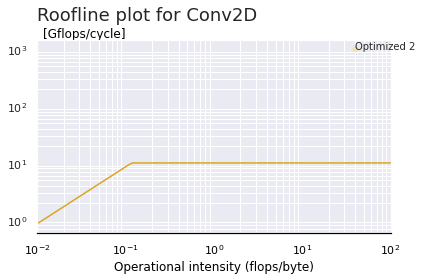

In [5]:
# Data points
kernel_name = 'Conv2D'
#peak performance [GFLOPS]
peak_perf = 10
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline], 
          [500.38, 3.94, color_optimized1], 
          [40, 1000, color_optimized2]] # TODO Last datapoint NOT available

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], 'p', color=kernel[i][2])

# Add labels to each datapoint
for i, txt in enumerate(kernel_names):
    ax.annotate(txt, (kernel[i][0], kernel[i][1]))#, fontdict=dict(color='black', alpha=0.5))

#setup plot
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01,100])
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('#000000')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)

plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

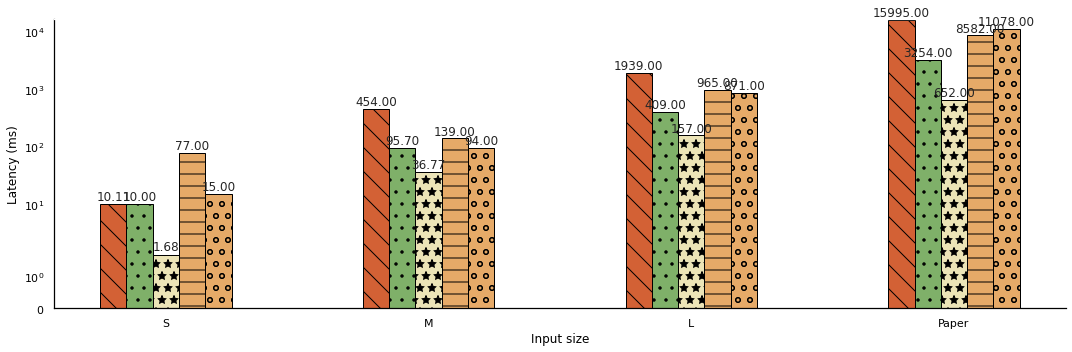

In [6]:
# Data points ####################################################################################

kernel_name = 'Conv2D'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([10.11,454,1939,15995])
optimized_1 = np.array([10,95.7,409,3254])
optimized_2 = np.array([1.679,36.774,157,652])
npbench_cpu = np.array([77,139,965,8582])
npbench_gpu = np.array([15,94,871,11078])

## PLOT ####################################################################################
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.1

rects3 = ax1.bar(input_size_xaxis_ticks - 2*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", hatch=hatch_baseline, edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks - 1*bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", hatch=hatch_optimized1, edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks, optimized_2, width= bar_width, color=color_optimized2,
       label="NPBench CPU", hatch=hatch_optimized2, edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="Optimized 1", hatch=hatch_npbench_CPU, edgecolor = 'black')

rects5 = ax1.bar(input_size_xaxis_ticks + 2*bar_width, npbench_gpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", hatch=hatch_npbench_GPU, edgecolor = 'black')

ax.set_title('Latencies for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)
# plt.axvline(x=4.5, color='black')
ax1.set_yscale('symlog')

# yticklocs = [0, 1, 2, 5, 10]
# ax1.set_yticks(yticklocs)
# ax1.set_yticklabels(yticklocs)
# ax1.yaxis.set_major_locator(plt.NullLocator())

# ax1.autoscale(tight = True)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Durbin

### Roofline

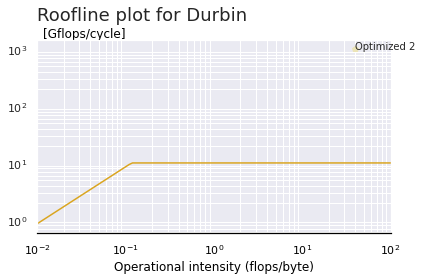

In [7]:
# Data points
kernel_name = 'Durbin'
#peak performance [GFLOPS]
peak_perf = 10
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline], 
          [500.38, 3.94, color_optimized1], 
          [40, 1000, color_optimized2]] # TODO Last datapoint NOT available

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], 'p', color=kernel[i][2])

# Add labels to each datapoint
for i, txt in enumerate(kernel_names):
    ax.annotate(txt, (kernel[i][0], kernel[i][1]))#, fontdict=dict(color='black', alpha=0.5))

#setup plot
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01,100])
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('#000000')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)

plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

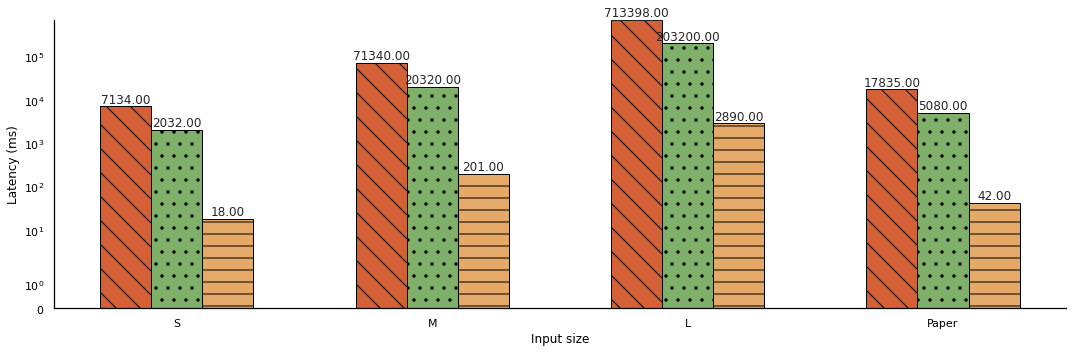

In [8]:
# Data points ####################################################################################

kernel_name = 'Durbin'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([7134,71340,713398,17835])
optimized_1 = np.array([2032,20320,203200,5080])
npbench_cpu = np.array([18,201,2890,42])

## PLOT ####################################################################################
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", hatch=hatch_baseline, edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", hatch=hatch_optimized1, edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", hatch=hatch_npbench_CPU, edgecolor = 'black')

ax.set_title('Latencies for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)
# plt.axvline(x=4.5, color='black')
ax1.set_yscale('symlog')

# yticklocs = [0, 1, 2, 5, 10]
# ax1.set_yticks(yticklocs)
# ax1.set_yticklabels(yticklocs)
# ax1.yaxis.set_major_locator(plt.NullLocator())

# ax1.autoscale(tight = True)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Gramschmidt

### Roofline

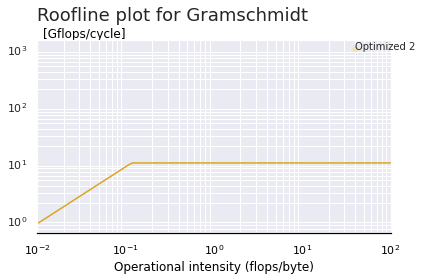

In [9]:
# Data points
kernel_name = 'Gramschmidt'
#peak performance [GFLOPS]
peak_perf = 10
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline], 
          [500.38, 3.94, color_optimized1], 
          [40, 1000, color_optimized2]] # TODO Last datapoint NOT available

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], 'p', color=kernel[i][2])

# Add labels to each datapoint
for i, txt in enumerate(kernel_names):
    ax.annotate(txt, (kernel[i][0], kernel[i][1]))#, fontdict=dict(color='black', alpha=0.5))

#setup plot
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01,100])
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('#000000')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)

plt.tight_layout() #Cuts waste white space
plt.savefig('{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

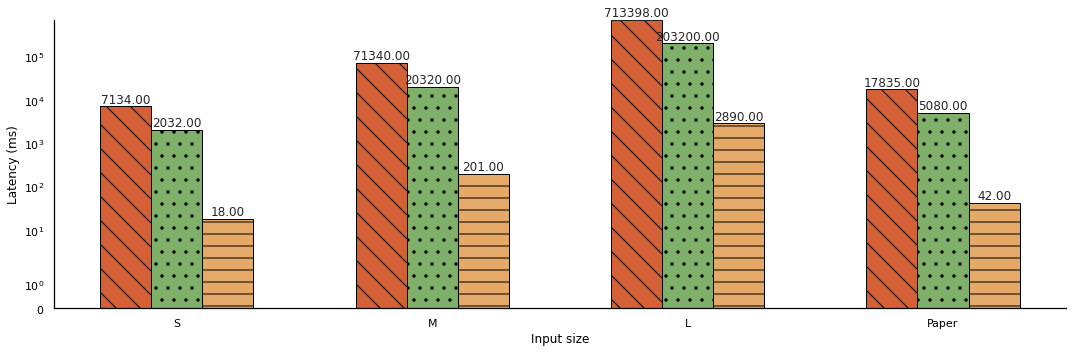

In [10]:
# Data points ####################################################################################

kernel_name = 'Gramschmidt'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([7134,71340,713398,17835])
optimized_1 = np.array([2032,20320,203200,5080])
npbench_cpu = np.array([18,201,2890,42])

## PLOT ####################################################################################
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", hatch=hatch_baseline, edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", hatch=hatch_optimized1, edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", hatch=hatch_npbench_CPU, edgecolor = 'black')

ax.set_title('Latencies for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)
# plt.axvline(x=4.5, color='black')
ax1.set_yscale('symlog')

# yticklocs = [0, 1, 2, 5, 10]
# ax1.set_yticks(yticklocs)
# ax1.set_yticklabels(yticklocs)
# ax1.yaxis.set_major_locator(plt.NullLocator())

# ax1.autoscale(tight = True)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout() #Cuts waste white space
plt.savefig('{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Cavity Flow

### Roofline

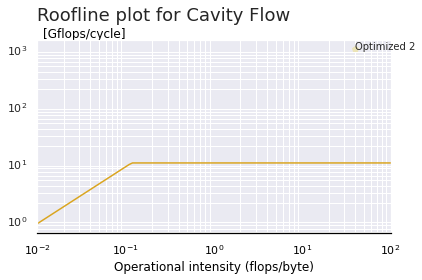

In [11]:
# Data points
kernel_name = 'Cavity Flow'
#peak performance [GFLOPS]
peak_perf = 10
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline], 
          [500.38, 3.94, color_optimized1], 
          [40, 1000, color_optimized2]] # TODO Last datapoint NOT available

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], 'p', color=kernel[i][2])

# Add labels to each datapoint
for i, txt in enumerate(kernel_names):
    ax.annotate(txt, (kernel[i][0], kernel[i][1]))#, fontdict=dict(color='black', alpha=0.5))

#setup plot
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01,100])
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('#000000')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)

plt.tight_layout() #Cuts waste white space
plt.savefig('{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

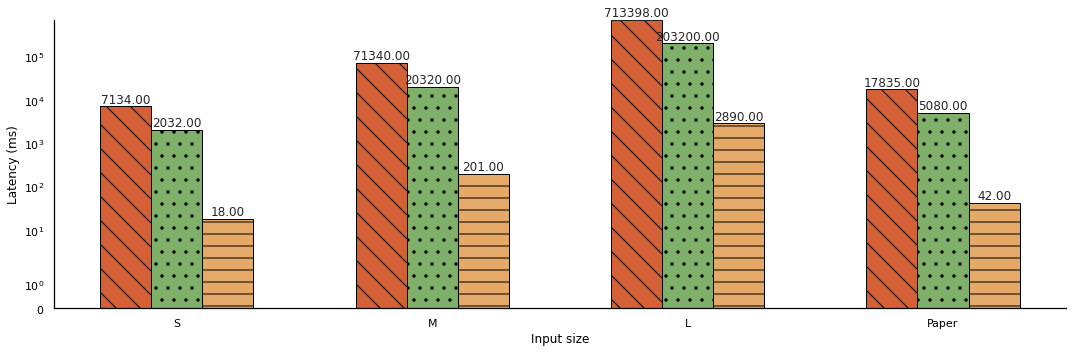

In [12]:
# Data points ####################################################################################

kernel_name = 'Cavity Flow'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([7134,71340,713398,17835])
optimized_1 = np.array([2032,20320,203200,5080])
npbench_cpu = np.array([18,201,2890,42])

## PLOT ####################################################################################
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", hatch=hatch_baseline, edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", hatch=hatch_optimized1, edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", hatch=hatch_npbench_CPU, edgecolor = 'black')

ax.set_title('Latencies for {}'.format(kernel_name), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
# ax.xticks #TODO
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)
# plt.axvline(x=4.5, color='black')
ax1.set_yscale('symlog')

# yticklocs = [0, 1, 2, 5, 10]
# ax1.set_yticks(yticklocs)
# ax1.set_yticklabels(yticklocs)
# ax1.yaxis.set_major_locator(plt.NullLocator())

# ax1.autoscale(tight = True)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout() #Cuts waste white space
plt.savefig('{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


In [13]:
!pwd

/home/amanglik/dpchpc
